### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("globalConfirmedCases.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, 
          inplace=True
         )

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Mar 4,94190,3219,51037
Mar 5,96595,3310,53532
Mar 6,100153,3403,55703
Mar 7,102188,3491,57389
Mar 8,107671,3654,60659


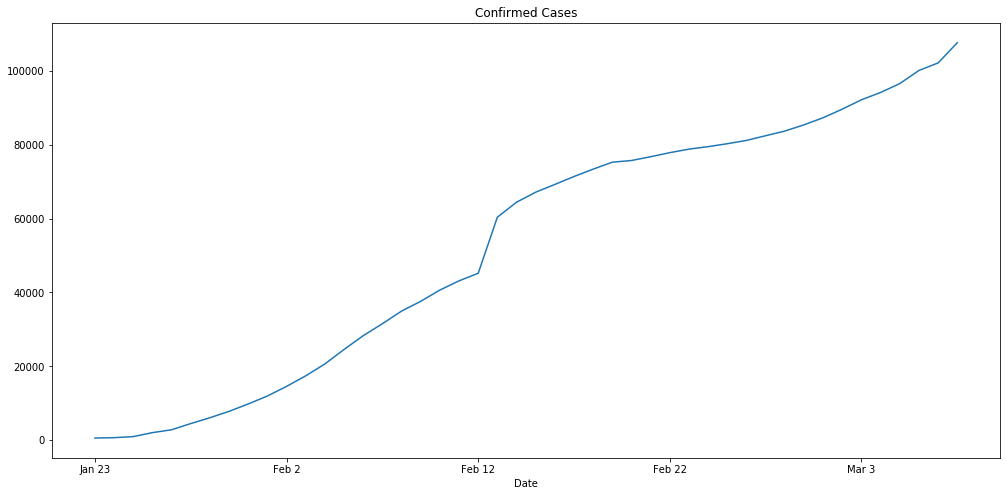

In [7]:
df.TotalConfirmedCases.plot(title="Confirmed Cases", figsize=(17, 8))

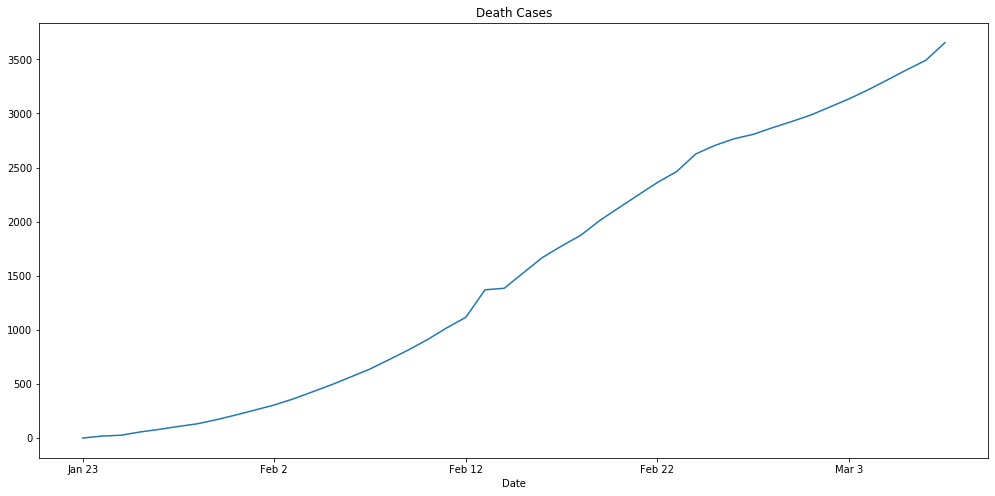

In [8]:
df.TotalDeaths.plot(title="Death Cases", figsize=(17, 8))

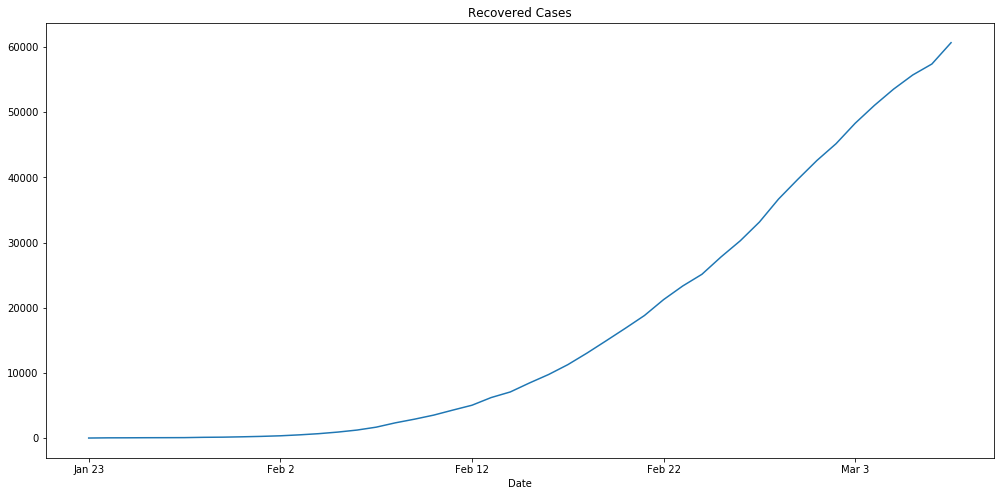

In [9]:
df.TotalRecovered.plot(title="Recovered Cases", figsize=(17, 8))

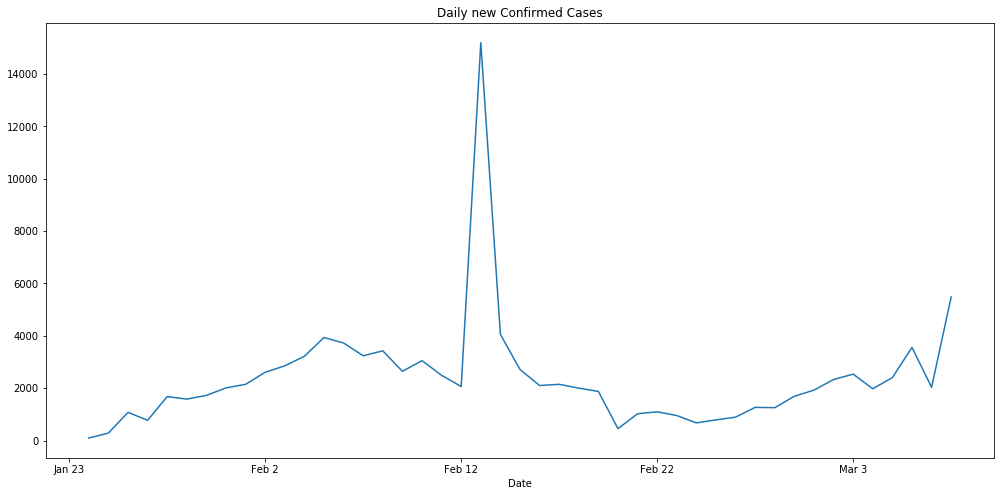

In [10]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily new Confirmed Cases", figsize=(17, 8))

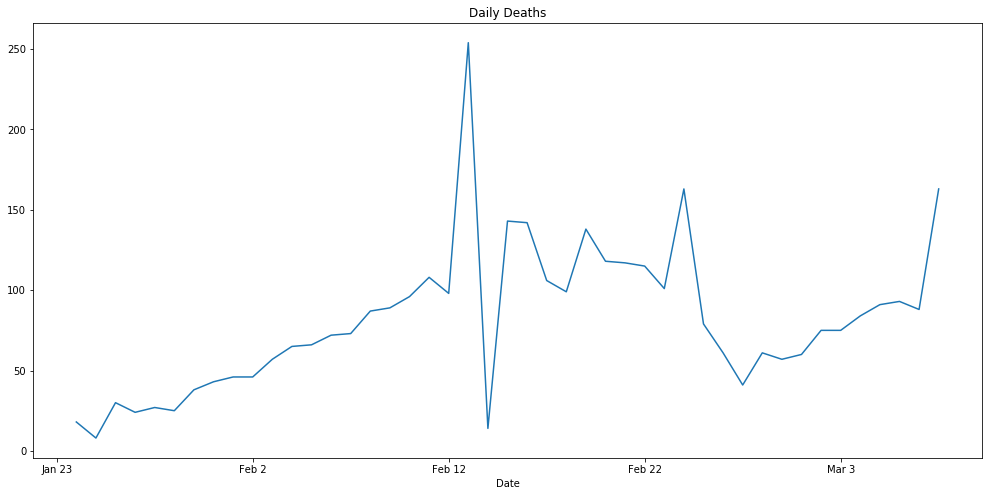

In [11]:
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(title="Daily Deaths", figsize=(17, 8))

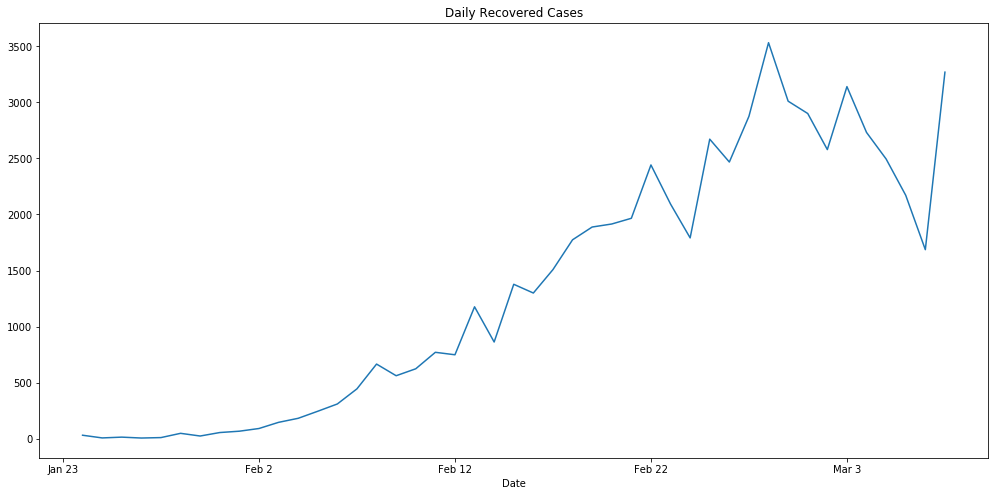

In [12]:
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(title="Daily Recovered Cases", figsize=(17, 8))

### Constants for predictions

In [13]:
predicted_days = 15
firstPredictionDay = datetime.datetime(2020,3,9)

### Arima for confirmed cases

In [14]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=825.251, BIC=828.864, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0); AIC=824.398, BIC=829.818, Fit time=0.347 seconds
Fit ARIMA: order=(0, 1, 1); AIC=825.032, BIC=830.452, Fit time=0.445 seconds
Fit ARIMA: order=(2, 1, 0); AIC=825.587, BIC=832.813, Fit time=0.444 seconds
Fit ARIMA: order=(1, 1, 1); AIC=825.184, BIC=832.411, Fit time=0.496 seconds
Fit ARIMA: order=(2, 1, 1); AIC=827.169, BIC=836.202, Fit time=0.747 seconds
Total fit time: 3.002 seconds


In [15]:
confirmed_model.aic()

824.3975903129865

In [16]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [17]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [18]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-03-09 - 110841
2020-03-10 - 113426
2020-03-11 - 115862
2020-03-12 - 118260
2020-03-13 - 120649
2020-03-14 - 123036
2020-03-15 - 125422
2020-03-16 - 127807
2020-03-17 - 130193
2020-03-18 - 132579
2020-03-19 - 134964
2020-03-20 - 137350
2020-03-21 - 139735
2020-03-22 - 142121
2020-03-23 - 144507


### Arima for death cases

In [19]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=452.117, BIC=462.822, Fit time=0.644 seconds
Fit ARIMA: order=(0, 2, 0); AIC=477.383, BIC=480.951, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=456.403, BIC=461.755, Fit time=0.150 seconds
Fit ARIMA: order=(0, 2, 1); AIC=453.952, BIC=459.305, Fit time=0.125 seconds
Fit ARIMA: order=(1, 2, 2); AIC=450.423, BIC=459.344, Fit time=0.434 seconds
Fit ARIMA: order=(1, 2, 1); AIC=450.727, BIC=457.864, Fit time=0.312 seconds
Fit ARIMA: order=(1, 2, 3); AIC=452.477, BIC=463.182, Fit time=1.559 seconds
Fit ARIMA: order=(2, 2, 3); AIC=451.551, BIC=464.040, Fit time=1.882 seconds
Fit ARIMA: order=(0, 2, 2); AIC=448.476, BIC=455.613, Fit time=0.251 seconds
Fit ARIMA: order=(0, 2, 3); AIC=450.401, BIC=459.322, Fit time=0.361 seconds
Total fit time: 5.771 seconds


In [20]:
deaths_model.aic()

448.4763595552661

In [21]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [22]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [23]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-03-09 - 3754
2020-03-10 - 3885
2020-03-11 - 4018
2020-03-12 - 4154
2020-03-13 - 4293
2020-03-14 - 4434
2020-03-15 - 4578
2020-03-16 - 4725
2020-03-17 - 4873
2020-03-18 - 5025
2020-03-19 - 5179
2020-03-20 - 5335
2020-03-21 - 5494
2020-03-22 - 5656
2020-03-23 - 5820


### Arima for recovered cases

In [24]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=649.384, BIC=660.089, Fit time=0.863 seconds
Fit ARIMA: order=(0, 2, 0); AIC=650.513, BIC=654.081, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=646.545, BIC=651.898, Fit time=0.249 seconds
Fit ARIMA: order=(0, 2, 1); AIC=645.049, BIC=650.402, Fit time=0.244 seconds
Fit ARIMA: order=(1, 2, 1); AIC=647.048, BIC=654.184, Fit time=0.459 seconds
Fit ARIMA: order=(0, 2, 2); AIC=647.048, BIC=654.184, Fit time=0.339 seconds
Fit ARIMA: order=(1, 2, 2); AIC=647.469, BIC=656.390, Fit time=0.928 seconds
Total fit time: 3.120 seconds


In [25]:
recovered_model.aic()

645.0493735915102

In [26]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [27]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [28]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-03-09 - 63452
2020-03-10 - 66308
2020-03-11 - 69227
2020-03-12 - 72210
2020-03-13 - 75255
2020-03-14 - 78363
2020-03-15 - 81534
2020-03-16 - 84768
2020-03-17 - 88065
2020-03-18 - 91425
2020-03-19 - 94848
2020-03-20 - 98333
2020-03-21 - 101882
2020-03-22 - 105494
2020-03-23 - 109169
